In [1]:
from imblearn import over_sampling
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
plt.rcParams["figure.figsize"] = (20,15)

In [3]:
cs_data = pd.read_csv("features/cornershop_data.csv")

In [4]:
cs_data.sample(10)

,session_id,customer_type,session_duration_microseconds,signed_up,pages_visited,app_removed,personalise_store_pageviews,purposeful_shelves_pageviews,digi_me_pageviews,homepage_duration_microseconds,...,entered_store,visited_purposeful_shelves,entered_dm,visited_digi_me,visited_personalised_store,entered_welcome,entered_purposeful_shelves,cos_month,cos_wday,completed_transaction
731,1.660726e+09,0,0.000332,0,7,0,2,0,0,3.024343e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.090170e-01,0.781831,0
5,1.664794e+09,0,0.000416,0,9,0,0,4,0,2.602278e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.123234e-17,0.974928,0
651,1.658830e+09,0,0.000016,0,3,0,0,0,0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.539905e-01,0.900969,0
476,1.663071e+09,0,0.013509,0,32,0,6,11,0,1.867965e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.564345e-01,0.900969,0
78,1.655478e+09,0,0.000000,0,0,1,0,0,0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.877853e-01,0.433884,0
1319,1.658406e+09,1,0.000169,0,7,0,0,0,0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.539905e-01,0.623490,0
464,1.656329e+09,0,0.003521,0,10,0,8,0,0,3.228544e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.877853e-01,0.974928,0
67,1.648725e+09,0,0.000114,0,2,0,0,0,0,2.628638e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.910065e-01,0.623490,0
1248,1.659696e+09,1,0.005559,0,8,0,0,0,0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.090170e-01,0.433884,0
471,1.663760e+09,0,0.007972,0,12,0,0,0,0,1.138379e-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.564345e-01,0.781831,0


In [5]:
cs_data = cs_data.replace({np.NaN: 0})

In [6]:
cs_data[['session_id', 'completed_transaction']].groupby('completed_transaction').count()

,session_id
completed_transaction,
0,1358
1,24


Plotting out the graph based on two different features.

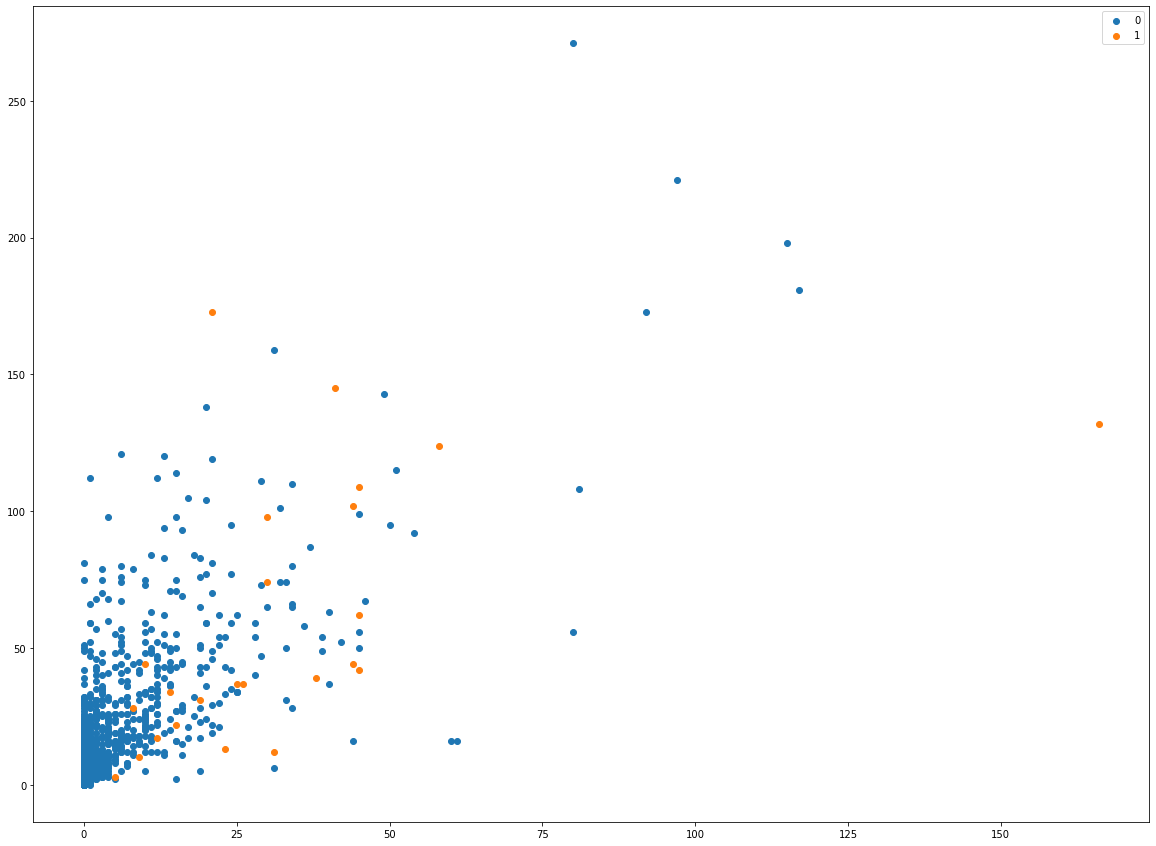

In [7]:
groups = cs_data.groupby('completed_transaction')

for name, group in groups:
    plt.scatter(group.purposeful_shelves_pageviews, group.pages_visited, label=name)

plt.legend()

Separating features from target variable

In [8]:
y = cs_data['completed_transaction']
x_cols = list(set(cs_data.columns) - set('completed_transaction'))
X = cs_data[x_cols]

In [9]:
print(y.name)
print("\n\n", X.columns)

completed_transaction


 Index(['quantity', 'visited_digi_me', 'app_removed', 'completed_transaction',
       'entered_purposeful_shelves', 'visited_personalised_store',
       'visited_purposeful_shelves', 'add_to_cart',
       'session_duration_microseconds', 'digi_me_pageviews',
       'notification_receive', 'cos_wday', 'personalise_store_pageviews',
       'session_id', 'signed_up', 'notification_open',
       'purposeful_shelves_pageviews', 'homepage_duration_microseconds',
       'scan_qr', 'price', 'entered_welcome', 'cos_month', 'customer_type',
       'entered_dm', 'pages_visited', 'total_cost', 'entered_store'],
      dtype='object')


In [10]:
counter = Counter(y)
print(counter)

Counter({0: 1358, 1: 24})


Oversampling with synthetic data using SMOTE

In [11]:
oversample = over_sampling.SMOTE()
X, y = oversample.fit_resample(X, y)

In [12]:
counter = Counter(y)
print(counter)

Counter({0: 1358, 1: 1358})


In [13]:
smotified_data = X
smotified_data['transaction_completed'] = y

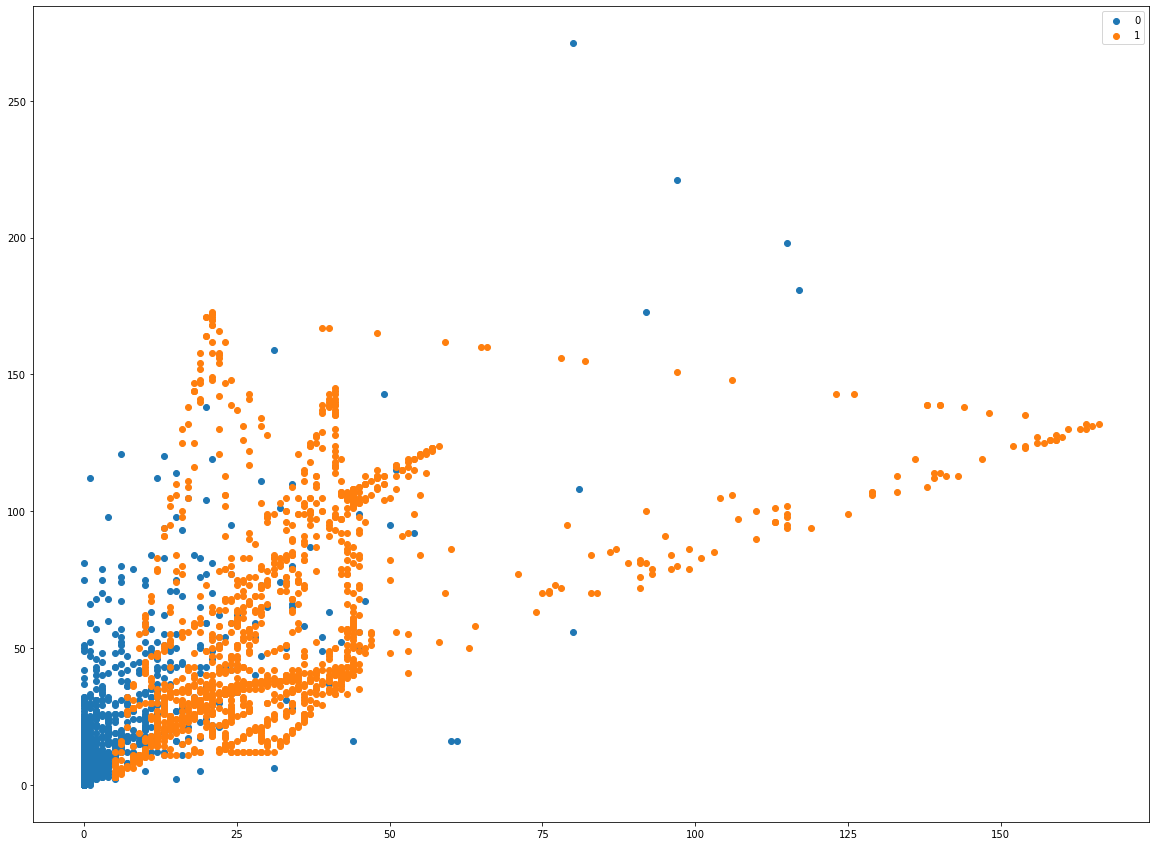

In [14]:
groups_2 = smotified_data.groupby('completed_transaction')

for name, group in groups_2:
    plt.scatter(group.purposeful_shelves_pageviews, group.pages_visited, label=name)

plt.legend()

In [15]:
smotified_data[['transaction_completed', 'session_id', 'visited_purposeful_shelves']].groupby(['transaction_completed']).mean()

,session_id,visited_purposeful_shelves
transaction_completed,,
0,1.657477e+09,0.058174
1,1.660556e+09,0.270233


In [16]:
smotified_data[['transaction_completed', 'session_id', 'pages_visited']].groupby(['transaction_completed']).mean()

,session_id,pages_visited
transaction_completed,,
0,1.657477e+09,16.893962
1,1.660556e+09,59.756996
